In [1]:
import sys
print(sys.version)
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import cv2
import os
from skimage import io

3.11.6 (tags/v3.11.6:8b6ee5b, Oct  2 2023, 14:57:12) [MSC v.1935 64 bit (AMD64)]


In [2]:
from keras.datasets import mnist

[[[124 144 153]
  [124 144 153]
  [124 144 153]
  ...
  [216 225 234]
  [217 224 234]
  [217 224 234]]

 [[124 144 153]
  [124 144 153]
  [124 144 153]
  ...
  [216 225 234]
  [217 224 234]
  [217 224 234]]

 [[124 144 153]
  [124 144 153]
  [124 144 153]
  ...
  [216 225 234]
  [217 224 234]
  [217 224 234]]

 ...

 [[158 149 142]
  [158 149 142]
  [157 148 141]
  ...
  [176 136  84]
  [178 138  87]
  [178 138  87]]

 [[158 149 142]
  [158 149 142]
  [157 148 141]
  ...
  [175 135  83]
  [176 136  85]
  [176 136  85]]

 [[158 149 142]
  [158 149 142]
  [157 148 141]
  ...
  [174 134  82]
  [176 136  85]
  [176 136  85]]]


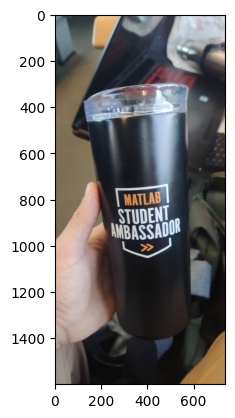

In [13]:
testing = mpimg.imread('./bottle.jpg')
plt.imshow(testing)
print(testing)

bottle.jpg
./bottle.jpg
cap.jpg
./cap.jpg
cup.jpg
./cup.jpg
gum_on_banana.jpg
./gum_on_banana.jpg
lettuce.jpg
./lettuce.jpg


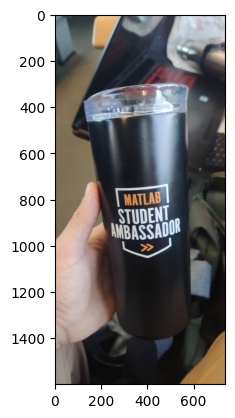

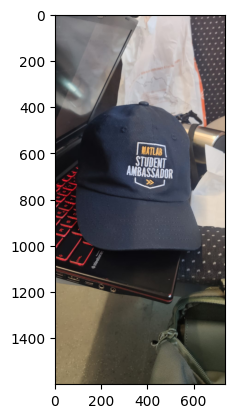

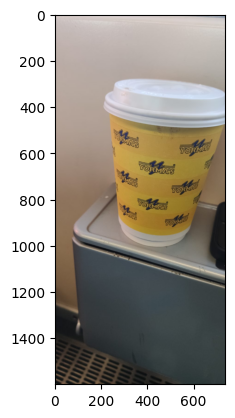

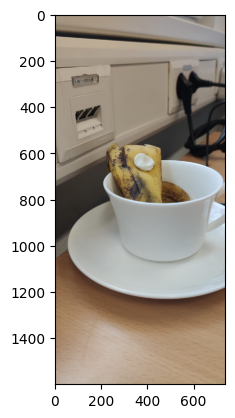

In [14]:
root_path = "C:/Users/sexysehe/OneDrive - ltu.se/Master's programme in applied AI/2ND YEAR/2ND Quarter/Applied AI - D7041E/Lab 1"
images = [] #738*1600
images.clear()

for i in os.listdir(root_path):
    if i.endswith(".jpg"):
        print(i)
        filename = "./" + i
        print(filename)
        image = mpimg.imread(filename)
        height, width = image.shape[:2]
        new_height, new_width = 1600, 738

        # Initialize the new image array with zeros
        resized_img = np.zeros((new_height, new_width, image.shape[2]), dtype=np.uint8)

        # Nearest neighbor interpolation for resizing the image
        for i in range(new_height):
            for j in range(new_width):
                # Mapping the coordinates to the original image size
                orig_i, orig_j = i * height // new_height, j * width // new_width
                resized_img[i, j] = image[orig_i, orig_j]
        images.append(resized_img)
for i in range(4):
    plt.figure()
    plt.imshow(images[i])


(5, 1600, 738, 3)


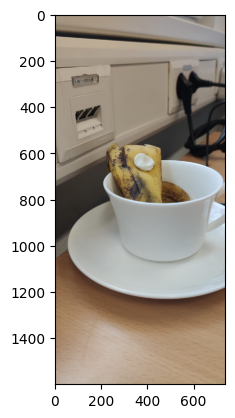

In [15]:
def PlotSample (array, index):
    plt.figure()
    plt.imshow(array[index])

PlotSample(images, 3)
print(np.array(images).shape)

Load the vectors from the dataset provided

In [16]:
imported_dataset = np.load('vecs.npy', allow_pickle = True).item()
#print(imported_dataset)

In [17]:
print(list(imported_dataset['9_pos'].keys()))
print(len(imported_dataset['9_pos'][9][0]))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
1024


This took me approximately 1:45h

In [18]:
import random
def element_shuffler (dictionary):
    labels=[]
    embeddings=[]
    picked_randoms = []
    picked_randoms_2 = []
    elements_added = 0
    for i in range(len(dictionary)):
        lower_limit = 1
        upper_limit = 9
        picked_randoms_2.clear()
        random_integer = random.randint(lower_limit, upper_limit)
        while random_integer in picked_randoms: #this will iterate WHILE the random integer is one of the elements of the list picked_randoms
            random_integer = random.randint(lower_limit, upper_limit)
        picked_randoms.append(random_integer)
        main_key = str(random_integer)+'_pos'
        for c in range(10):
            lower_limit_2 = 0
            upper_limit_2 = 9
            random_integer_2 = random.randint(lower_limit_2, upper_limit_2)
            while random_integer_2 in picked_randoms_2:
                random_integer_2 = random.randint(lower_limit_2, upper_limit_2)
            picked_randoms_2.append(random_integer_2)
        for j in range(len(picked_randoms_2)):
            for k in range(len(list(dictionary[main_key][picked_randoms_2[j]]))):
                labels.append(list(dictionary[main_key])[picked_randoms_2[j]])#TODO - problem here with i out of index somehow
                embeddings.append(dictionary[main_key][picked_randoms_2[j]][k])
    
    zipped_lists = list(zip(labels, embeddings))
    random.shuffle(zipped_lists)
    labels_shuffled, embeddings_shuffled = zip(*zipped_lists)
    labels_shuffled = list(labels_shuffled)
    embeddings_shuffled = list(embeddings_shuffled)

    
    #print(picked_randoms)
    return [labels_shuffled, embeddings_shuffled]


In [19]:
dataset = element_shuffler(imported_dataset)
print(np.shape(dataset[0]))
print(np.shape(np.array(dataset[1])))



(11302,)
(11302, 1024)


In [3]:
(Xtr, Ltr), (X_test, L_test)=mnist.load_data()
print("cell executed")

cell executed


In [21]:
Xtr.shape

(60000, 28, 28)

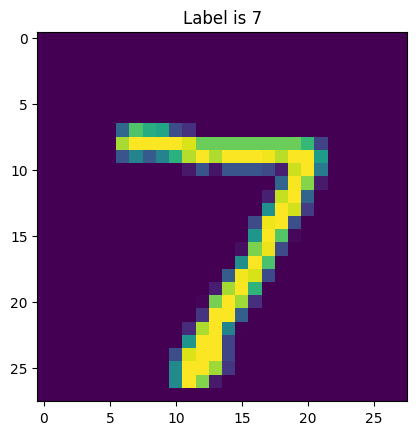

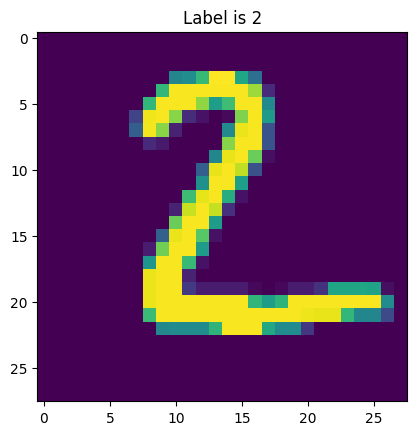

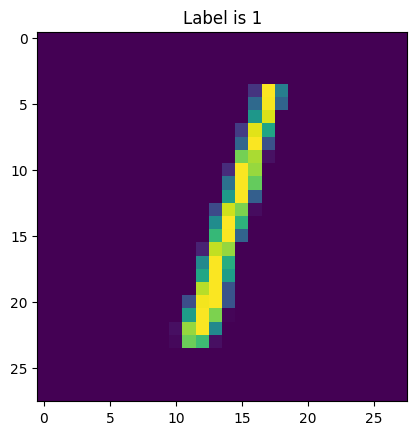

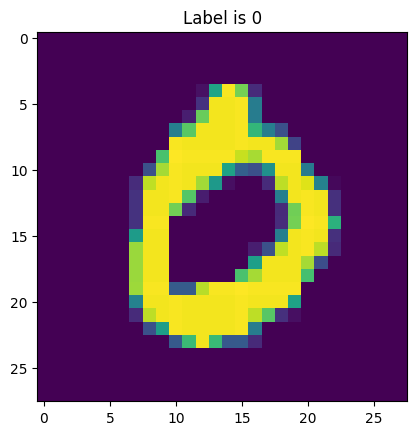

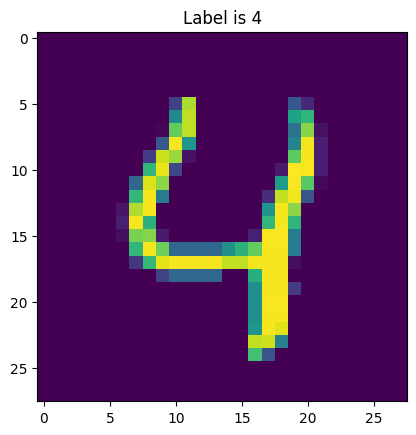

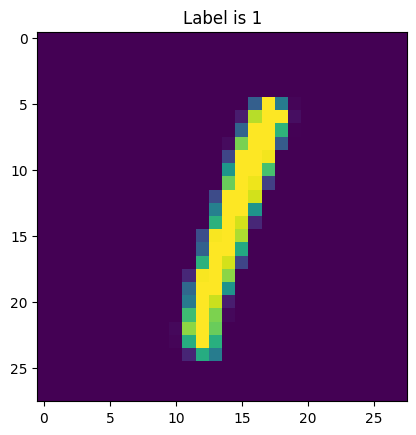

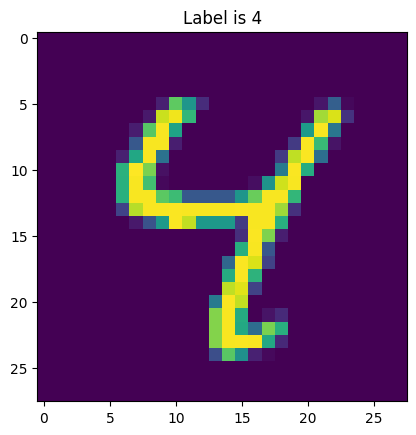

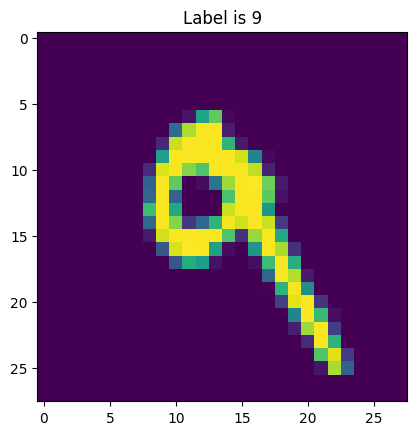

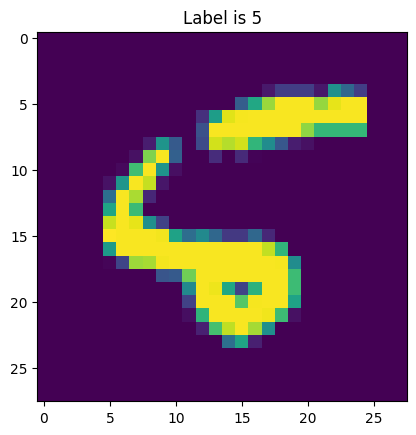

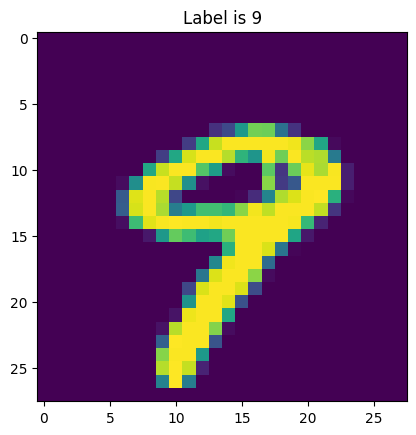

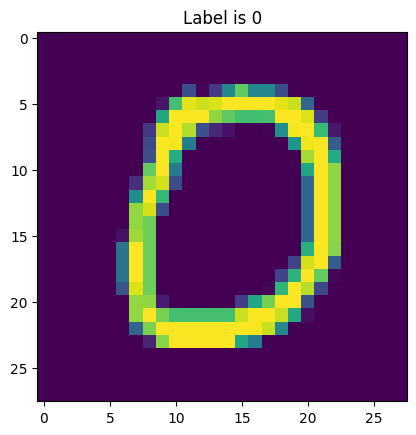

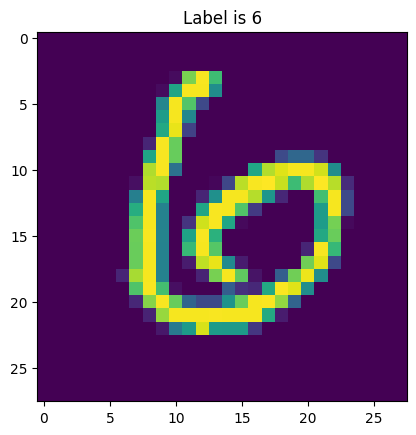

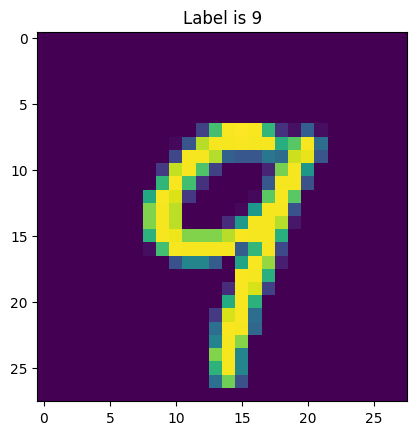

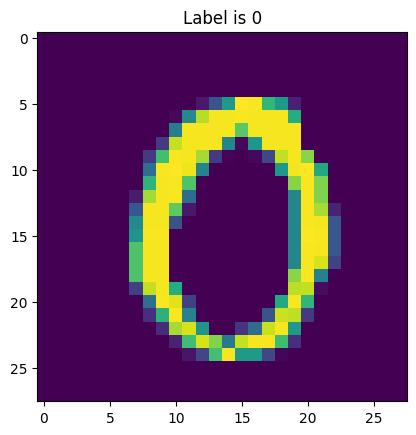

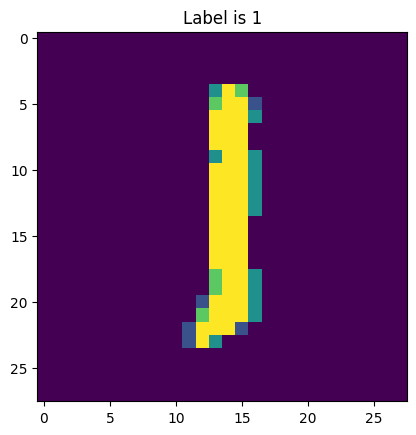

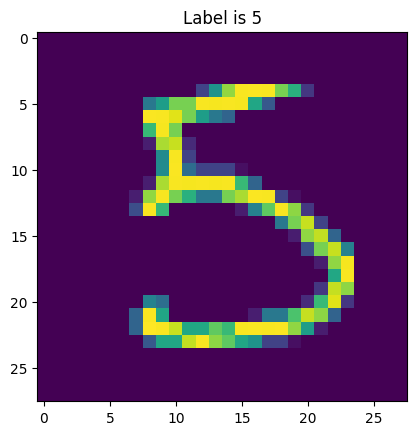

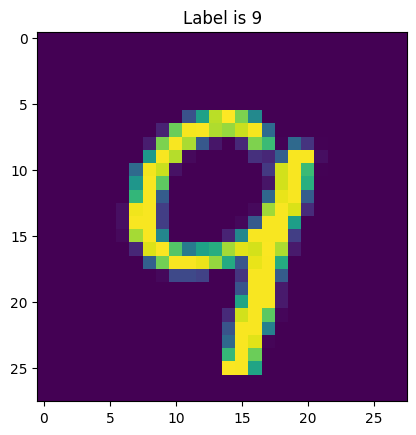

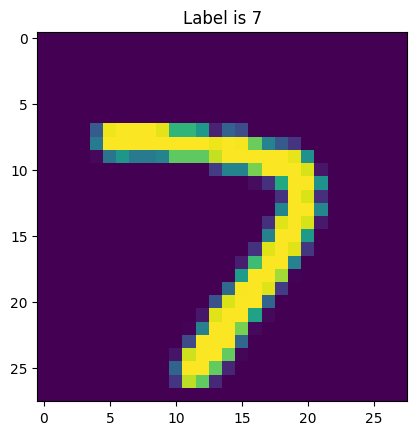

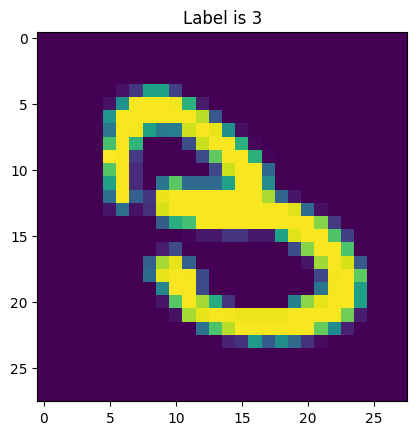

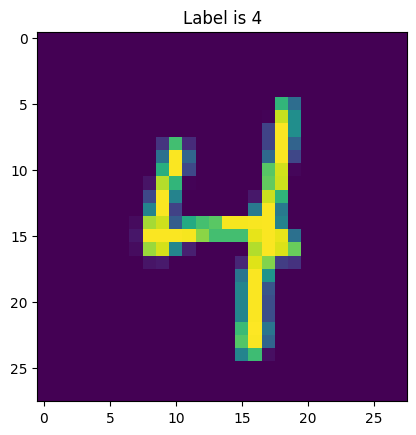

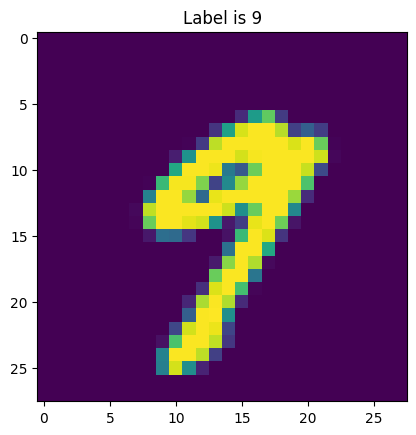

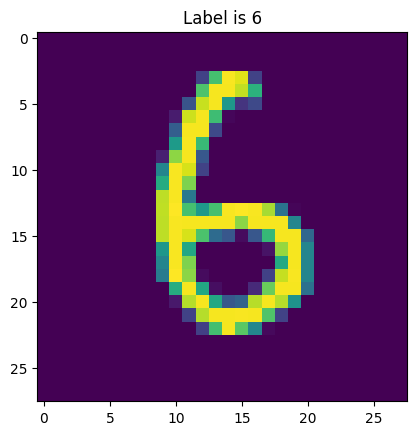

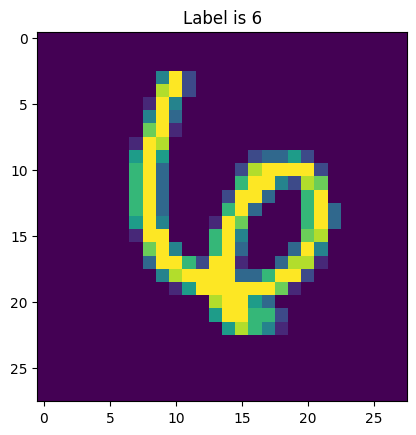

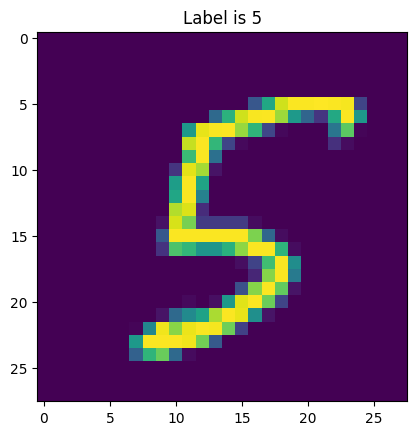

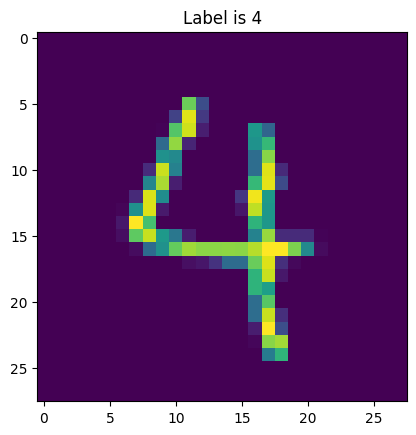

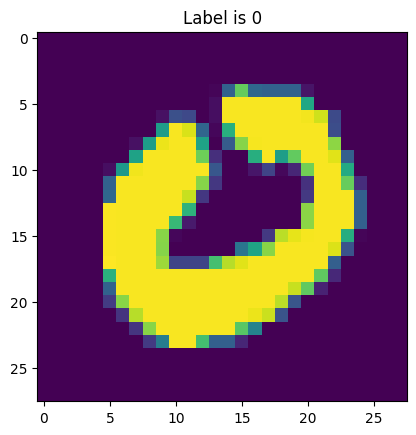

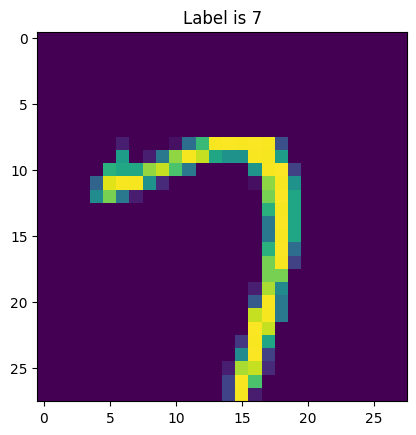

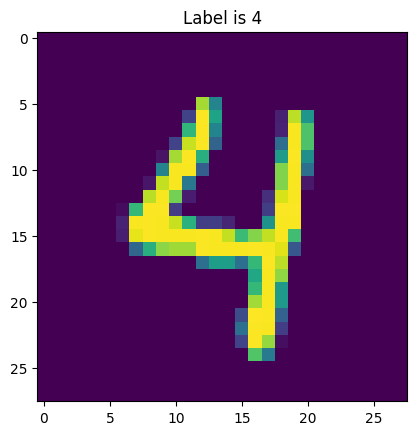

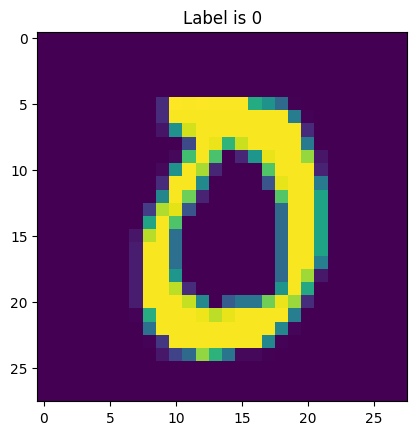

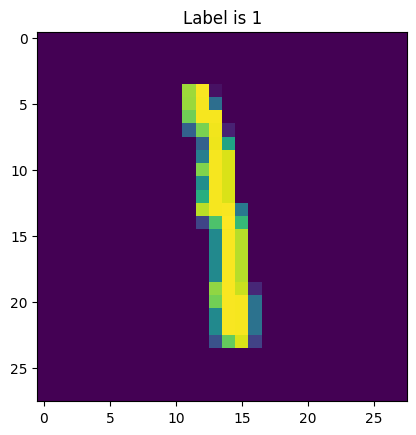

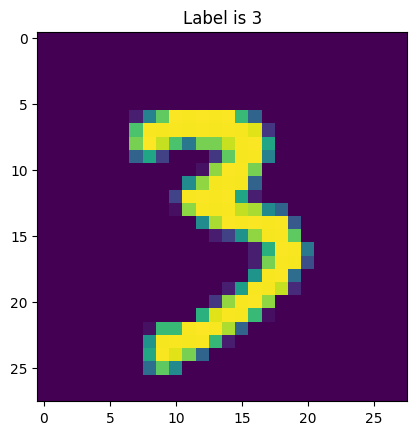

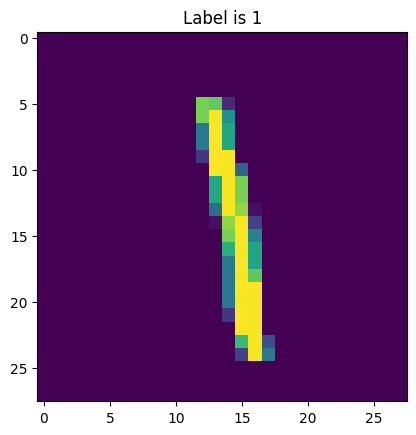

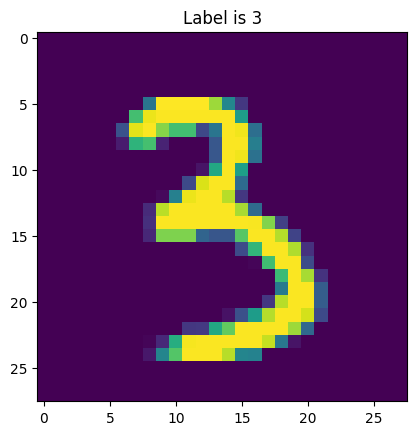

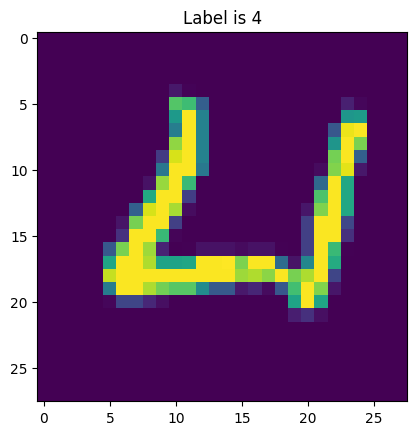

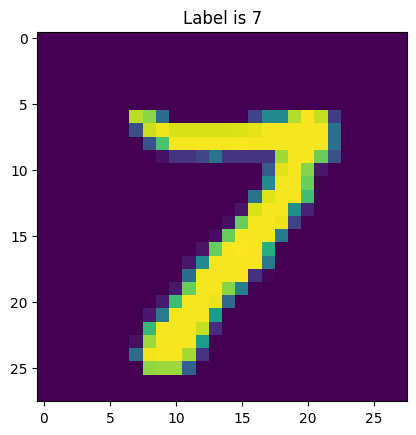

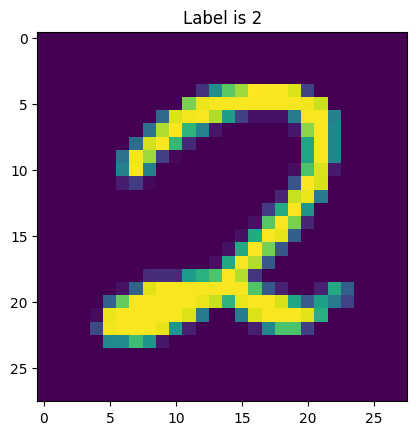

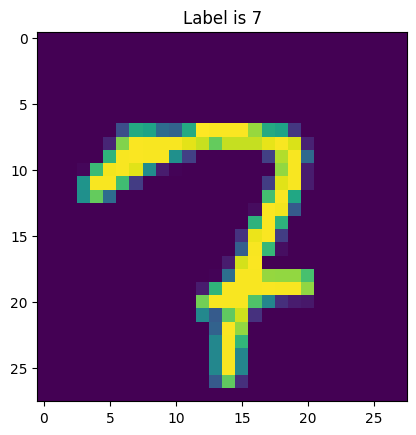

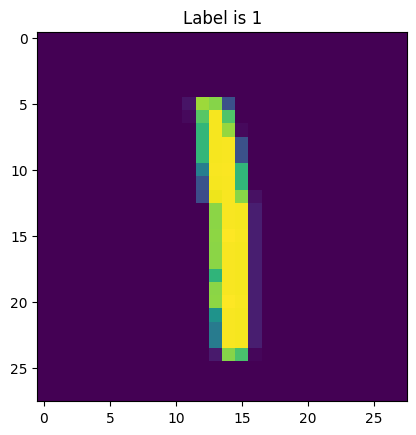

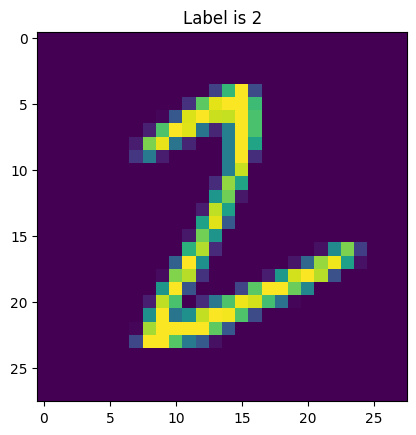

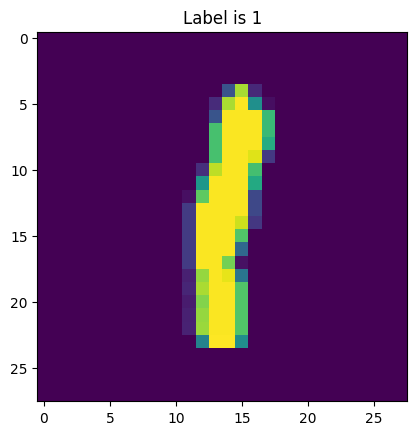

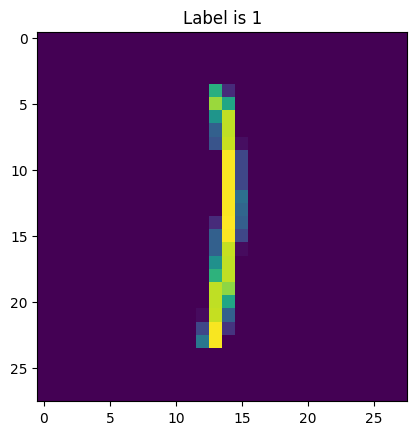

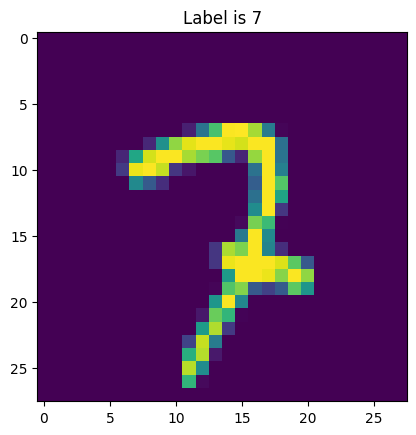

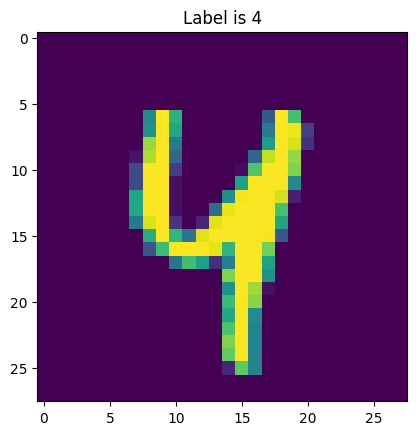

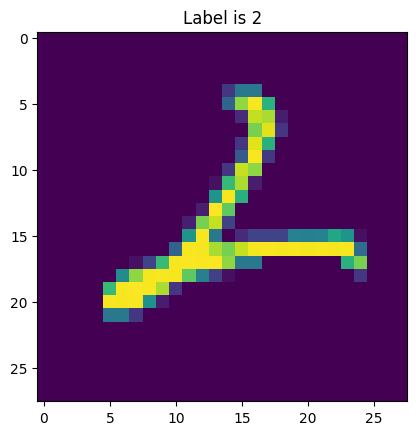

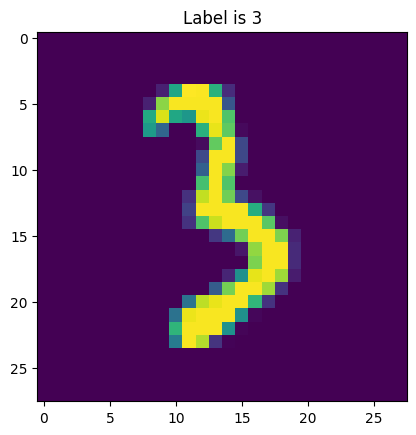

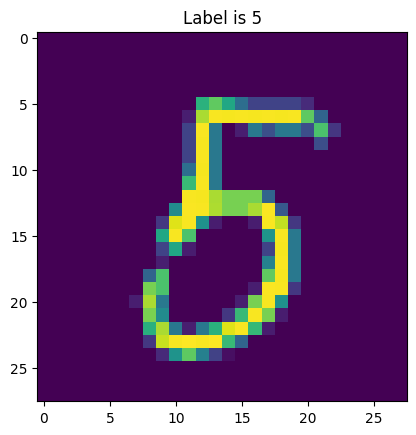

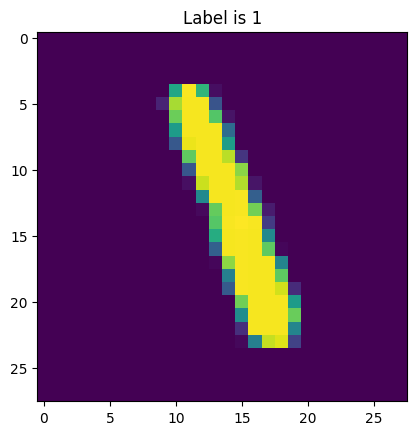

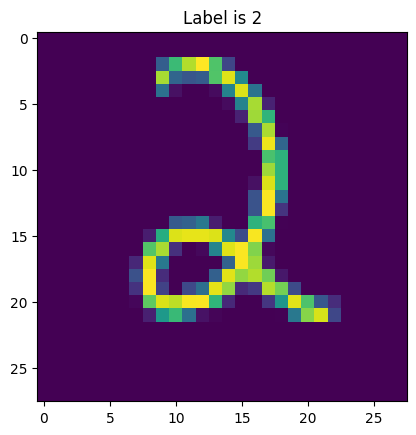

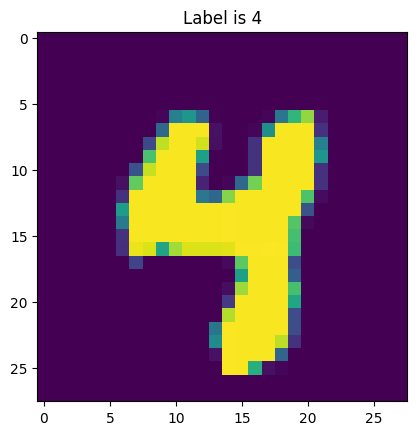

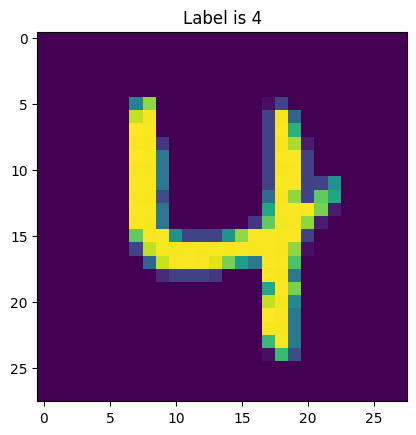

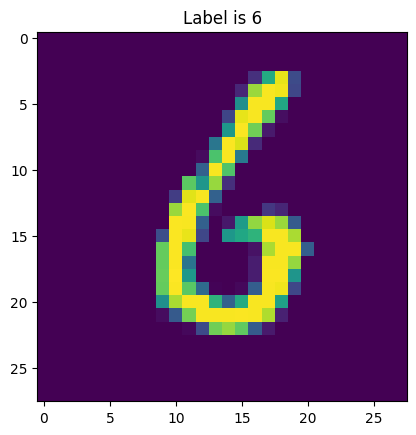

In [8]:
Image=X_test[0,:,:]
for i in range(51):
    Image = X_test[i,:,:]
    Label = L_test [i]
    plt.title('Label is {Label}'.format(Label=Label))
    plt.imshow(Image)

    plt.show()
    plt.close()


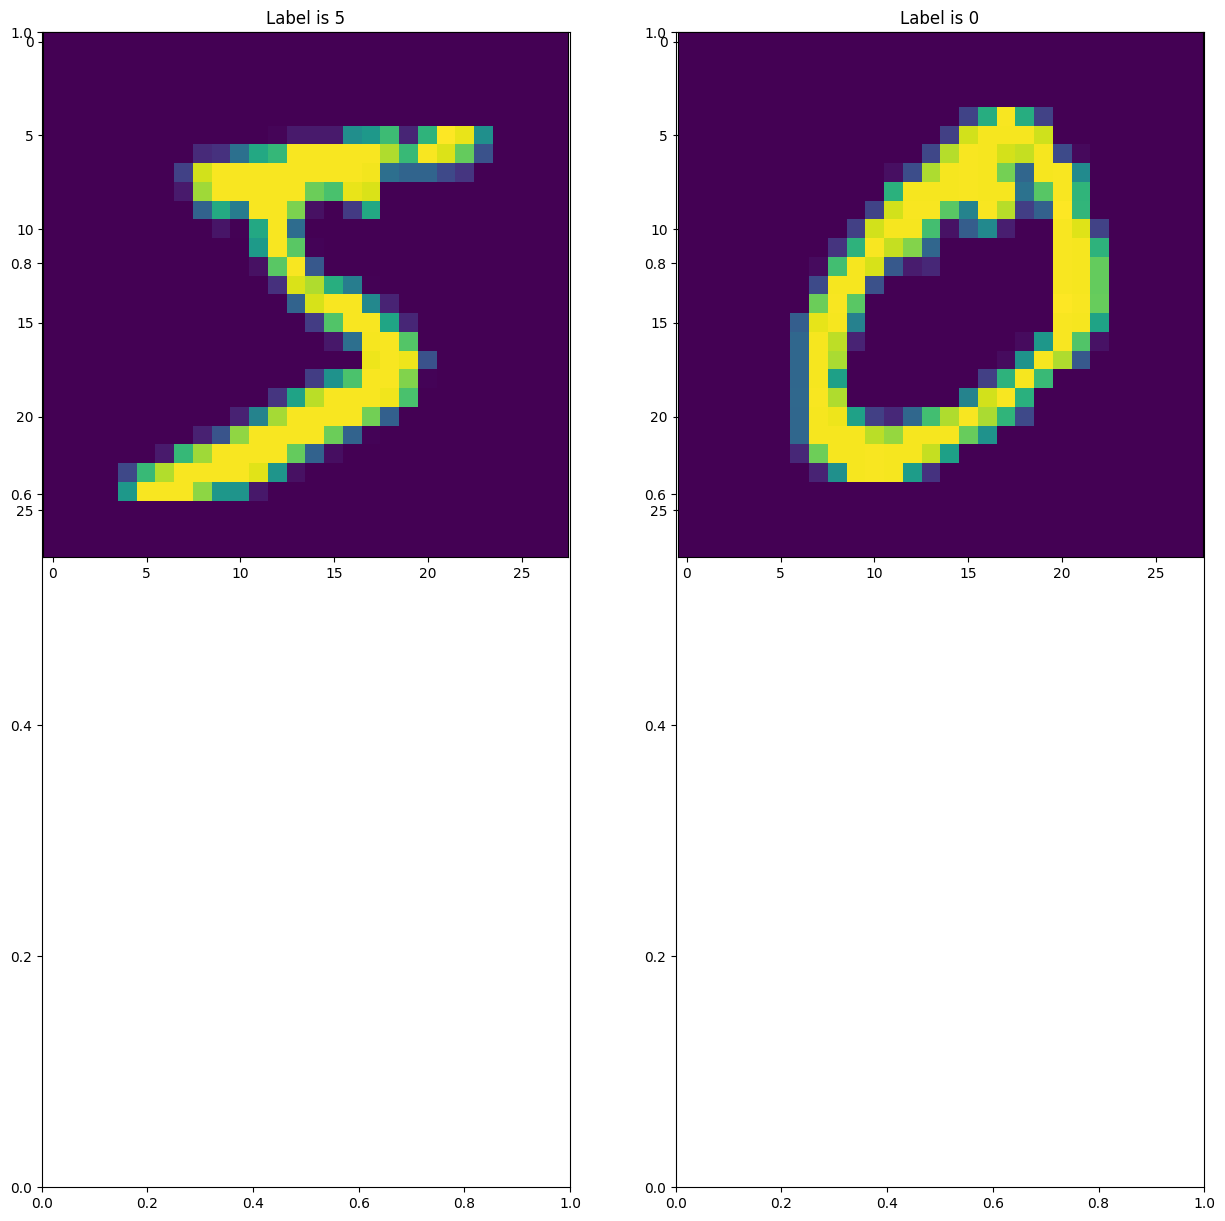

In [23]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,15))
ax0=plt.subplot(2,2,1)
ax1=plt.subplot(2,2,2)

Image=Xtr[0,:,:]
Label=Ltr[0]
Image1=Xtr[1,:,:]
Label1=Ltr[1]


ax0.set_title('Label is {Label}'.format(Label=Label))
ax0.imshow(Image)
ax1.set_title('Label is {Label}'.format(Label=Label1))
ax1.imshow(Image1)


plt.show()
plt.close()


In [24]:
28*28

784

In [8]:
#Traing phase
num_sample=500
Tr_set=Xtr[:num_sample,:,:]
Ltr_set=Ltr[:num_sample]
Tr_set_original = Tr_set
Tr_set=Tr_set.reshape(num_sample,Tr_set.shape[1]*Tr_set.shape[2])

#Tr_set=Tr_set.reshape(num_sample,Tr_set.shape[1]*Tr_set.shape[2]).astype()
Tr_set.shape

(500, 784)

Task 2.1 

In [10]:
def predict(X):
    num_test=X.shape[0]
    Lpred=np.zeros(num_test, dtype=Ltr_set.dtype)
    
    for i in range(num_test):
        distances=np.sum(np.abs(Tr_set-X[i,:]),axis=1)
        
        min_index= np.argmin(distances)
        Lpred[i]=Ltr_set[min_index]
    return Lpred

In [13]:
Test_images=X_test.reshape(X_test.shape[0],X_test.shape[1]* X_test.shape[2])
print(Test_images.shape)
Labels_predicted=predict(Test_images)

print("Accuracy:", np.mean(Labels_predicted==L_test))



(10000, 784)
Accuracy: 0.2649


The accuracy for the previous method was 26.49%

Now we are trying to change the distance calculation method to L2 norm

In [62]:
def predict(X):
    num_test=X.shape[0]
    Lpred=np.zeros(num_test, dtype=Ltr_set.dtype)
    distances=[]
    for i in range(num_test):
        distances=np.sqrt(np.sum(np.abs(Tr_set-X[i,:])**2,axis=1))      
        min_index= np.argmin(distances)
        Lpred[i]=Ltr_set[min_index]
    return Lpred

In [63]:
Test_images=X_test.reshape(X_test.shape[0],X_test.shape[1]* X_test.shape[2])
Labels_predicted=predict(Test_images)

print("Accuracy:", np.mean(Labels_predicted==L_test))

Accuracy: 0.19


Now the accuracy has gone down to 19%

# Now we are trying to improve it by changing how the shortest distance is calculated. I believe it might be a problem with the reshape function.

### Update: I have realized that it is the datatype that makes the training data not be able to be used for the algorithm, since it is uint8 and does not work with negative values (which is a problem when deducting the value of the pixel of the test image). That being said, I will provide two ways of solving the problem below:

Approach 1: without using the reshaped dataset at all.

A problem with this approach is that it takes an incredibly long time due to the amount of operations in the for loops. I had to reduce the amount of samples considered per execution.

In [87]:
def predict(X):
    num_test=X.shape[0]
    Lpred=np.zeros(num_test, dtype=Ltr_set.dtype)
    distances = []
    for i in range(num_test):
        distances.clear()
        if i%20 == 0:
            print(f"Training completion: {100*(i/num_test)}%")
        for l in range(Tr_set_original.shape[0]):
            current_distance = 0
            for j in range(X.shape[1]):
                for k in range(X.shape[2]):
                    current_distance+=(X[i,j,k]-Tr_set_original[l,j,k])**2
            current_distance = np.sqrt(current_distance)
            distances.append(current_distance)
        min_index= np.argmin(distances)
        Lpred[i]=Ltr_set[min_index]
    return Lpred

In [90]:
random_start = random.randint(0, 9499)
Labels_predicted=predict(X_test[random_start:random_start+500,:,:])

print("Accuracy:", np.mean(Labels_predicted==L_test[random_start:random_start+500]))

Training completion: 0.0%


C:\Users\sexysehe\AppData\Local\Temp\ipykernel_18460\2196180447.py:13: RuntimeWarning: overflow encountered in scalar subtract
  current_distance+=(X[i,j,k]-Tr_set_original[l,j,k])**2


Training completion: 4.0%
Training completion: 8.0%
Training completion: 12.0%
Training completion: 16.0%
Training completion: 20.0%
Training completion: 24.0%
Training completion: 28.000000000000004%
Training completion: 32.0%
Training completion: 36.0%
Training completion: 40.0%
Training completion: 44.0%
Training completion: 48.0%
Training completion: 52.0%
Training completion: 56.00000000000001%
Training completion: 60.0%
Training completion: 64.0%
Training completion: 68.0%
Training completion: 72.0%
Training completion: 76.0%
Training completion: 80.0%
Training completion: 84.0%
Training completion: 88.0%
Training completion: 92.0%
Training completion: 96.0%
Accuracy: 0.568


Approach 2: Changing the data type to int which can handle negative values.

In [14]:
num_sample=500
Tr_set=Xtr[:num_sample,:,:]
Ltr_set=Ltr[:num_sample]
Tr_set_original = Tr_set
Tr_set=Tr_set.reshape(num_sample,Tr_set.shape[1]*Tr_set.shape[2]).astype(int)

#Tr_set=Tr_set.reshape(num_sample,Tr_set.shape[1]*Tr_set.shape[2]).astype()
Tr_set.shape

(500, 784)

In [15]:
def predict(X):
    num_test=X.shape[0]
    Lpred=np.zeros(num_test, dtype=Ltr_set.dtype)
    distances=[]
    for i in range(num_test):
        distances=np.sqrt(np.sum(np.abs(Tr_set-X[i,:])**2,axis=1))      
        min_index= np.argmin(distances)
        Lpred[i]=Ltr_set[min_index]
    return Lpred

In [16]:
Test_images=X_test.reshape(X_test.shape[0],X_test.shape[1]* X_test.shape[2])
Labels_predicted=predict(Test_images)

print("Accuracy:", np.mean(Labels_predicted==L_test))

Accuracy: 0.8294


As we can see this approach solved the problem and increased the accuracy a lot. I wonder if I would get a similar accuracy with the first approach if I used the whole test dataset

Now we are going to improve our code by adding a crucial functionality of KNN, being able to choose K!

In [2]:
def predict(X,k=1):
    num_test=X.shape[0]
    Lpred=np.zeros(num_test, dtype=Ltr_set.dtype)
    distances=[]
    for i in range(num_test):
        distances=np.sqrt(np.sum(np.abs(Tr_set-X[i,:])**2,axis=1))      
        indices_of_nearest_neighbors = np.argpartition(distances, k)[:k]
        nearest_labels = Ltr_set[indices_of_nearest_neighbors]
        #voting mechanism
        unique_labels, counts = np.unique(nearest_labels, return_counts=True)
        predicted_label = unique_labels[np.argmax(counts)]
        Lpred[i] = predicted_label

    return Lpred

In [3]:
Test_images=X_test.reshape(X_test.shape[0],X_test.shape[1]* X_test.shape[2])
Labels_predicted=predict(Test_images,1)
print("Accuracy:", np.mean(Labels_predicted==L_test))

NameError: name 'X_test' is not defined

# Task 2.2 cross validation to see the best number for K:

In [164]:
Tr_set_Cross_Val=Xtr[num_sample:num_sample+10000,:,:]
Tr_set_Cross_Val = Tr_set_Cross_Val.reshape(Tr_set_Cross_Val.shape[0],Tr_set_Cross_Val.shape[1]*Tr_set_Cross_Val.shape[2])

Ltr_set_Cross_Val=Ltr[num_sample:num_sample+10000]

Best_Accuracy = 0
for i in range(3):
    Labels_predicted = predict(Tr_set_Cross_Val,i+1)
    Accuracy = np.mean(Labels_predicted==Ltr_set_Cross_Val)
    print(f"Accuracy for k={i+1} is: {Accuracy}")
    if Accuracy > Best_Accuracy:
        Best_Accuracy = Accuracy
        k = i+1
print(f"the best K value is: {k}")


Accuracy for k=1 is: 0.8304
Accuracy for k=2 is: 0.8119
Accuracy for k=3 is: 0.8165
the best K value is: 1


The accuracy value for the best performing K in the test dataset has already been calculated previously, it is 82.94%

Support Vector Machines, Examples from the provided link

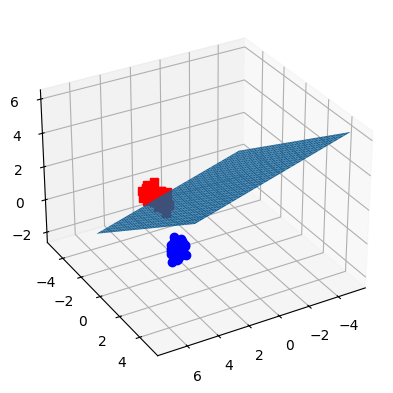

In [23]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from mpl_toolkits.mplot3d import Axes3D
iris = datasets.load_iris()
X = iris.data[:, :3] # we only take the first three features.
Y = iris.target
#make it binary classification problem
X = X[np.logical_or(Y==0,Y==1)]
Y = Y[np.logical_or(Y==0,Y==1)]
model = svm.SVC(kernel='linear')
clf = model.fit(X, Y)
# The equation of the separating plane is given by all x so that np.dot(svc.coef_[0], x) + b = 0.
# Solve for w3 (z)
z = lambda x,y: (-clf.intercept_[0]-clf.coef_[0][0]*x
-clf.coef_[0][1]*y) / clf.coef_[0][2]
tmp = np.linspace(-5,5,30)
x,y = np.meshgrid(tmp,tmp)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot3D(X[Y==0,0], X[Y==0,1], X[Y==0,2],'ob')
ax.plot3D(X[Y==1,0], X[Y==1,1], X[Y==1,2],'sr')
ax.plot_surface(x, y, z(x,y))
ax.view_init(30, 60)
plt.show()

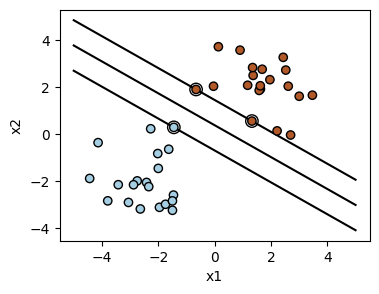

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
np.random.seed(2)
# we create 40 linearly separable points
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2)
+ [2, 2]]
Y = [0] * 20 + [1] * 20
# fit the model
clf = svm.SVC(kernel='linear', C=1)
clf.fit(X, Y)
# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.plot(xx, yy, "k-")
plt.plot(xx, yy_down, "k-")
plt.plot(xx, yy_up, "k-")
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:,1], s=80,
facecolors="none", zorder=10, edgecolors="k")
plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired,
edgecolors="k")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()


#### Task 3.1

In [35]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, f1_score



# import some data to play with
iris = load_iris()

X = iris.data #All features
y = iris.target
feature_names = iris.feature_names[:4]
classes = iris.target_names


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, train_size=0.8)
print(X_train.shape)
print(X_test.shape)

print(Y_train.shape)
print(Y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


Test the different options for the SVM classifiers and do their confusion matrices:


In [36]:
classifiers = [['linear','ovo'],['poly','ovo'],['rbf','ovo'],['linear','ovr'],['poly','ovr'],['rbf','ovr']]
Classifier = []
for params in classifiers:
    Classifier = SVC(kernel = params[0], decision_function_shape = params[1]).fit(X_train, Y_train)
    classifier_params = Classifier.get_params()
    y_pred = Classifier.predict(X_test)
    accuracy = np.mean(y_pred == Y_test)
    f1 = f1_score(Y_test, y_pred, average='weighted')  # 'weighted' takes class imbalance into account
    conf_matrix = confusion_matrix(Y_test, y_pred)
    print(f"we obtain a F1 Score of: {f1} and an accuracy of: {accuracy} with the SVM classifier with {params[0]} kernel using the {params[1]} training approach")
    print(conf_matrix)
    

we obtain a F1 Score of: 0.9666666666666667 and an accuracy of: 0.9666666666666667 with the SVM classifier with linear kernel using the ovo training approach
[[13  0  0]
 [ 0  8  1]
 [ 0  0  8]]
we obtain a F1 Score of: 0.9333333333333333 and an accuracy of: 0.9333333333333333 with the SVM classifier with poly kernel using the ovo training approach
[[13  0  0]
 [ 0  8  1]
 [ 0  1  7]]
we obtain a F1 Score of: 0.9666666666666667 and an accuracy of: 0.9666666666666667 with the SVM classifier with rbf kernel using the ovo training approach
[[13  0  0]
 [ 0  8  1]
 [ 0  0  8]]
we obtain a F1 Score of: 0.9666666666666667 and an accuracy of: 0.9666666666666667 with the SVM classifier with linear kernel using the ovr training approach
[[13  0  0]
 [ 0  8  1]
 [ 0  0  8]]
we obtain a F1 Score of: 0.9333333333333333 and an accuracy of: 0.9333333333333333 with the SVM classifier with poly kernel using the ovr training approach
[[13  0  0]
 [ 0  8  1]
 [ 0  1  7]]
we obtain a F1 Score of: 0.96666

We are now going to extract the support vectors for the linear kernel with the one vs rest training approach

In [116]:
Classifier = SVC(kernel = 'linear', decision_function_shape = 'ovr').fit(X_train, Y_train)
support_vectors = Classifier.support_vectors_
i = 0
print("class 1")
for j in range(Classifier.n_support_[0]):
    print(Classifier.support_vectors_[i])
    i += 1

print("class 2")
for j in range(Classifier.n_support_[1]):
    print(Classifier.support_vectors_[i])
    i += 1
    
print("class 3")
for j in range(Classifier.n_support_[2]):
    print(Classifier.support_vectors_[i])
    i += 1

class 1
[5.  3.  1.6 0.2]
[5.  3.5 1.6 0.6]
class 2
[6.7 3.  5.  1.7]
[6.3 2.5 4.9 1.5]
[6.2 2.2 4.5 1.5]
[5.1 2.5 3.  1.1]
[5.9 3.2 4.8 1.8]
[6.1 2.9 4.7 1.4]
[5.6 3.  4.5 1.5]
[5.4 3.  4.5 1.5]
[6.3 3.3 4.7 1.6]
[6.9 3.1 4.9 1.5]
class 3
[7.2 3.  5.8 1.6]
[6.1 3.  4.9 1.8]
[4.9 2.5 4.5 1.7]
[5.9 3.  5.1 1.8]
[6.2 2.8 4.8 1.8]
[6.  3.  4.8 1.8]
[6.3 2.5 5.  1.9]
[6.5 3.2 5.1 2. ]
[6.5 3.  5.2 2. ]
[6.  2.2 5.  1.5]


In [101]:
print((X_train[:,0].min(), X_train[:,0].max()))

(4.3, 7.9)


Now we are going to print the decision boundaries for features 2 vs 3 and 3 vs 4:

Text(0, 0.5, 'x2')

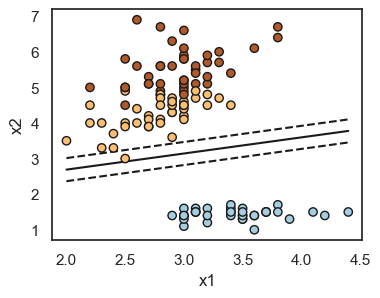

In [109]:
coefs = Classifier.coef_
w = Classifier.coef_[0] #0 corresponds to class 1vs2
x_points = np.linspace(X_train[:,1].min(), X_train[:,1].max())
y_points = (-w[1]/w[2]) * x_points - (Classifier.intercept_[0]) /w[2]
margin = 1/np.sqrt(np.sum(coefs**2))
aux_coef = np.sqrt(1+(-w[1]/w[2])**2)

upper_boundary = y_points + aux_coef*margin
lower_boundary = y_points - aux_coef*margin

# plot the line, the points, and the nearest vectors to the plane
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.plot(x_points, y_points, "k-")
plt.plot(x_points, lower_boundary, "k--")
plt.plot(x_points, upper_boundary, "k--")
plt.scatter(X_train[:, 1], X_train[:, 2], c=Y_train, zorder=10, cmap=plt.cm.Paired,
 edgecolors="k")
plt.xlabel("x1")
plt.ylabel("x2")

Now we will do the same with features 3 and 4

Text(0, 0.5, 'x2')

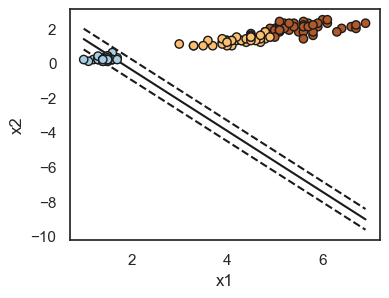

In [107]:
coefs = Classifier.coef_
w = Classifier.coef_[0] #0 corresponds to class 1vs2
x_points = np.linspace(X_train[:,2].min(), X_train[:,2].max())
y_points = (-w[2]/w[3]) * x_points - (Classifier.intercept_[0]) /w[3]
margin = 1/np.sqrt(np.sum(coefs**2))
aux_coef = np.sqrt(1+(-w[2]/w[3])**2)

upper_boundary = y_points + aux_coef*margin
lower_boundary = y_points - aux_coef*margin

# plot the line, the points, and the nearest vectors to the plane
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.plot(x_points, y_points, "k-")
plt.plot(x_points, lower_boundary, "k--")
plt.plot(x_points, upper_boundary, "k--")
plt.scatter(X_train[:, 2], X_train[:, 3], c=Y_train, zorder=10, cmap=plt.cm.Paired,
 edgecolors="k")
plt.xlabel("x1")
plt.ylabel("x2")